In [ ]:
pip install pymysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.5 MB/s 


In [ ]:
# First we need to import all the necessary libraries

import numpy as np  
import pandas as pd  
from bokeh.plotting import figure, output_file, show 
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set()
plt.rcParams["figure.figsize"] = (14,7)  #setting figure size

# Libtraries for accessing database 
import pymysql
import sqlalchemy as db
pd.options.display.max_columns = 100  #setting maximum column to display 100

# 
''' Libraries for reading and manipulating data (NumPy,Pandas)
Numpy is the library which has functions for working with mathematical functions,
matrices.First we imported NumPy then imported Pandas.Pandas is Python library 
used for data analysis.
    Libaries for data visualization(Matplotlib,seaborn,Bokeh)
Matplotlib is library which is used for creating static,animated visualizations 
in python.Seaborn is also used to create interactive visualizations.Bokeh is also 
used for creating highly interactive graphs and visualizations.
'''

# Code to ignore warnings from function usage
import warnings;
warnings.filterwarnings('ignore')

In [ ]:
# Libtraries for accessing database 
import pymysql
import sqlalchemy as db

In [ ]:
# uploading the test,train and ideal datasets in python environment here pandas library is used to convert datasets into pandas dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_ideal = '/content/drive/MyDrive/ideal.csv'
path_test = '/content/drive/MyDrive/test.csv'
path_train = '/content/drive/MyDrive/train.csv'

In [ ]:
ideal_df = pd.read_csv(path_ideal)
test_df = pd.read_csv(path_test)
train_df = pd.read_csv(path_train)

* Understanding the given dataset

In [ ]:
print(train_df.shape)
print(ideal_df.shape)
print(test_df.shape)

(400, 5)
(400, 51)
(100, 4)


In [ ]:
train_df.head()

,x,y1,y2,y3,y4
0,-20.0,-0.949086,0.434910,12.693979,-399.97922
1,-19.9,-0.861145,0.529980,13.365104,-395.90048
2,-19.8,-0.637008,0.797336,12.809087,-392.01907
3,-19.7,-0.691599,0.408887,13.033758,-388.03946
4,-19.6,-1.111933,0.182017,12.869656,-384.13022


In [ ]:
test_df.tail()

,x,y,y17,deviation
95,-15.8,0.763152,0.091907,111.013152
96,3.7,-355.829470,-0.529836,247.669470
97,4.2,-367.689640,-0.871576,261.599640
98,-2.2,-316.873020,-0.808496,212.833020
99,1.4,-216.562760,0.985450,114.552760


In [ ]:
ideal_df.head(3)

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33,y34,y35,y36,y37,y38,y39,y40,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,-20.0,-0.912945,0.408082,9.087055,5.408082,-9.087055,0.912945,-0.839071,-0.850919,0.816164,18.258905,-20.0,-58.0,-45.0,20.0,13.00,400.00,-400.00,800.00,410.00,289.00,-8000.000,8000.000,8000.000,-16000.000,-23995.000,-5832.000,10648.000,-8020.000,-7600.000,-8795.000,20.0,4.472136,20.124610,-0.746414,10.0,100.0,-20.0,-1.321027,399.08707,899.5919,-40.456474,40.20404,2.995732,-0.008333,12.995732,5.298317,-5.298317,-0.186278,0.912945,0.396850
1,-19.9,-0.867644,0.497186,9.132356,5.497186,-9.132356,0.867644,-0.865213,0.168518,0.994372,17.266117,-19.9,-57.7,-44.8,19.9,12.95,396.01,-396.01,792.02,406.01,285.61,-7880.599,7880.599,7880.599,-15761.198,-23636.797,-5735.339,10503.459,-7900.499,-7484.589,-8667.619,19.9,4.460942,20.025234,-0.620450,9.9,99.5,-19.9,-1.364830,395.14236,893.5128,-40.233820,40.04859,2.990720,-0.008340,12.990720,5.293305,-5.293305,-0.215690,0.867644,0.476954
2,-19.8,-0.813674,0.581322,9.186326,5.581322,-9.186326,0.813674,-0.889191,0.612391,1.162644,16.110740,-19.8,-57.4,-44.6,19.8,12.90,392.04,-392.04,784.08,402.04,282.24,-7762.392,7762.392,7762.392,-15524.784,-23282.176,-5639.752,10360.232,-7782.192,-7370.352,-8541.472,19.8,4.449719,19.925863,-0.475739,9.8,99.0,-19.8,-1.394996,391.22632,887.4587,-40.006836,39.89066,2.985682,-0.008347,12.985682,5.288267,-5.288267,-0.236503,0.813674,0.549129


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       400 non-null    float64
 1   y1      400 non-null    float64
 2   y2      400 non-null    float64
 3   y3      400 non-null    float64
 4   y4      400 non-null    float64
dtypes: float64(5)
memory usage: 15.8 KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   x          100 non-null    float64
 1   y          100 non-null    float64
 2   y17        100 non-null    float64
 3   deviation  100 non-null    float64
dtypes: float64(4)
memory usage: 3.2 KB


In [ ]:
ideal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       400 non-null    float64
 1   y1      400 non-null    float64
 2   y2      400 non-null    float64
 3   y3      400 non-null    float64
 4   y4      400 non-null    float64
 5   y5      400 non-null    float64
 6   y6      400 non-null    float64
 7   y7      400 non-null    float64
 8   y8      400 non-null    float64
 9   y9      400 non-null    float64
 10  y10     400 non-null    float64
 11  y11     400 non-null    float64
 12  y12     400 non-null    float64
 13  y13     400 non-null    float64
 14  y14     400 non-null    float64
 15  y15     400 non-null    float64
 16  y16     400 non-null    float64
 17  y17     400 non-null    float64
 18  y18     400 non-null    float64
 19  y19     400 non-null    float64
 20  y20     400 non-null    float64
 21  y21     400 non-null    float64
 22  y2

In [ ]:
ideal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       400 non-null    float64
 1   y1      400 non-null    float64
 2   y2      400 non-null    float64
 3   y3      400 non-null    float64
 4   y4      400 non-null    float64
 5   y5      400 non-null    float64
 6   y6      400 non-null    float64
 7   y7      400 non-null    float64
 8   y8      400 non-null    float64
 9   y9      400 non-null    float64
 10  y10     400 non-null    float64
 11  y11     400 non-null    float64
 12  y12     400 non-null    float64
 13  y13     400 non-null    float64
 14  y14     400 non-null    float64
 15  y15     400 non-null    float64
 16  y16     400 non-null    float64
 17  y17     400 non-null    float64
 18  y18     400 non-null    float64
 19  y19     400 non-null    float64
 20  y20     400 non-null    float64
 21  y21     400 non-null    float64
 22  y2

In [ ]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,100.0,0.386000,11.429485,-20.000000,-9.600000,0.800000,10.000000,19.600000
y,100.0,-82.491147,127.352109,-380.795230,-185.352815,-1.173921,0.994416,14.057193
y17,100.0,0.018309,0.649446,-0.999309,-0.552527,0.003982,0.600239,0.998941
deviation,100.0,189.195176,104.142000,5.492400,115.730054,180.985287,259.399604,412.851657


In [ ]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,400.0,-0.050000,11.561430,-20.000000,-10.025000,-0.050000,9.925000,19.900000
y1,400.0,0.009862,0.784599,-1.472194,-0.674066,-0.005232,0.716964,1.440584
y2,400.0,0.008468,0.767338,-1.458533,-0.620738,0.022990,0.637994,1.478101
y3,400.0,11.935270,1.840460,-19.103683,11.648611,12.259347,12.691353,13.430878
y4,400.0,-133.329952,119.420660,-399.979220,-225.268085,-99.817930,-25.079144,0.452231


In [ ]:
ideal_df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,400.0,-5.000000e-02,11.561430,-2.000000e+01,-10.025000,-5.000000e-02,9.925000,1.990000e+01
y1,400.0,-2.282363e-03,0.701386,-9.999902e-01,-0.695113,-3.981591e-03,0.689206,9.999902e-01
y2,400.0,4.560922e-02,0.713074,-9.999683e-01,-0.669387,9.586751e-02,0.753902,1.000000e+00
y3,400.0,9.997718e+00,0.701386,9.000010e+00,9.304887,9.996018e+00,10.689206,1.099999e+01
y4,400.0,5.045609e+00,0.713074,4.000032e+00,4.330613,5.095868e+00,5.753902,6.000000e+00
y5,400.0,-9.997718e+00,0.701386,-1.099999e+01,-10.689206,-9.996018e+00,-9.304887,-9.000010e+00
y6,400.0,2.282363e-03,0.701386,-9.999902e-01,-0.689206,3.981591e-03,0.695113,9.999902e-01
y7,400.0,-5.439078e-02,0.721907,-9.999647e-01,-0.801144,-9.587089e-02,0.672522,1.000000e+00
y8,400.0,3.072600e-02,0.717805,-9.999979e-01,-0.672318,3.880327e-02,0.775285,9.999931e-01
y9,400.0,9.121843e-02,1.426147,-1.999937e+00,-1.338774,1.917350e-01,1.507804,2.000000e+00


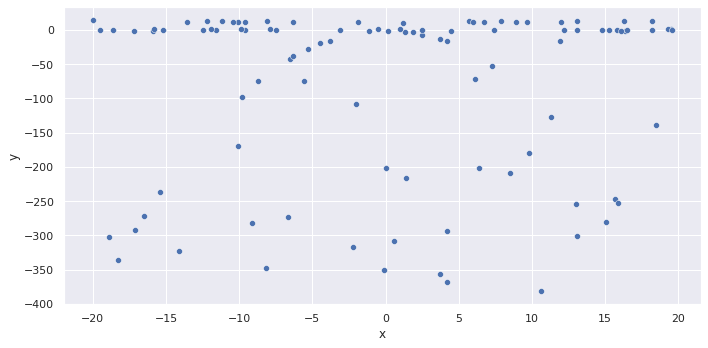

In [ ]:
'''
Drawing scatter plot for test data x and y.
'''

sns.scatterplot(test_df['x'],test_df['y'])
plt.show()

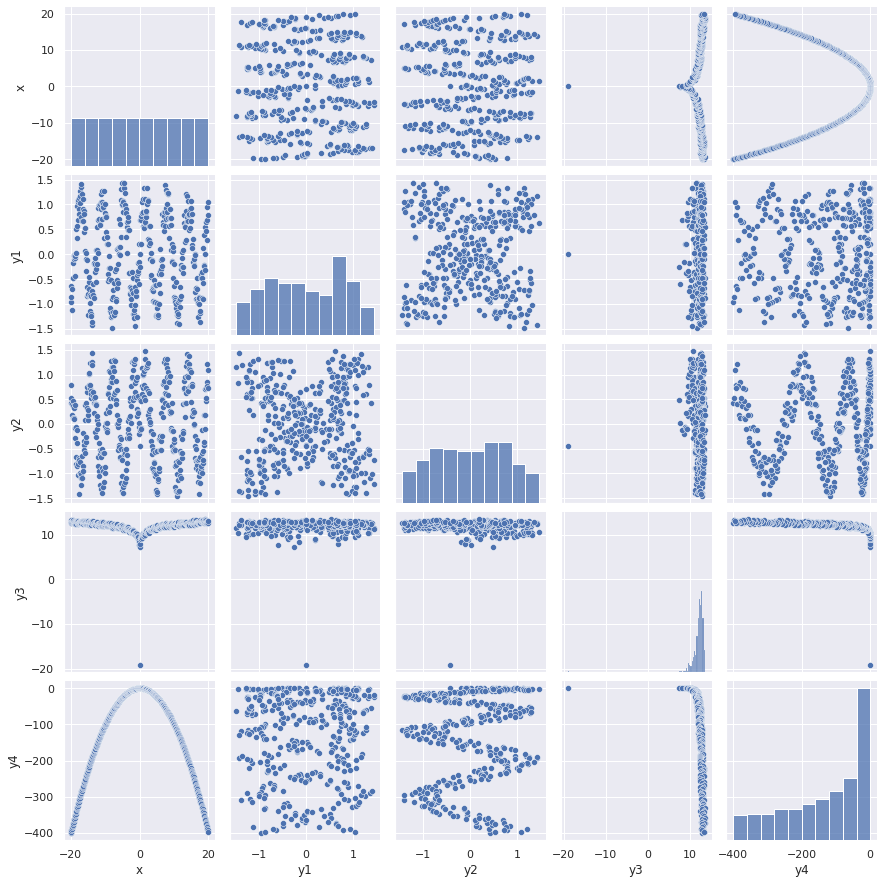

In [ ]:
# drawing pair plot for train dataframe
sns.pairplot(train_df)
plt.show()

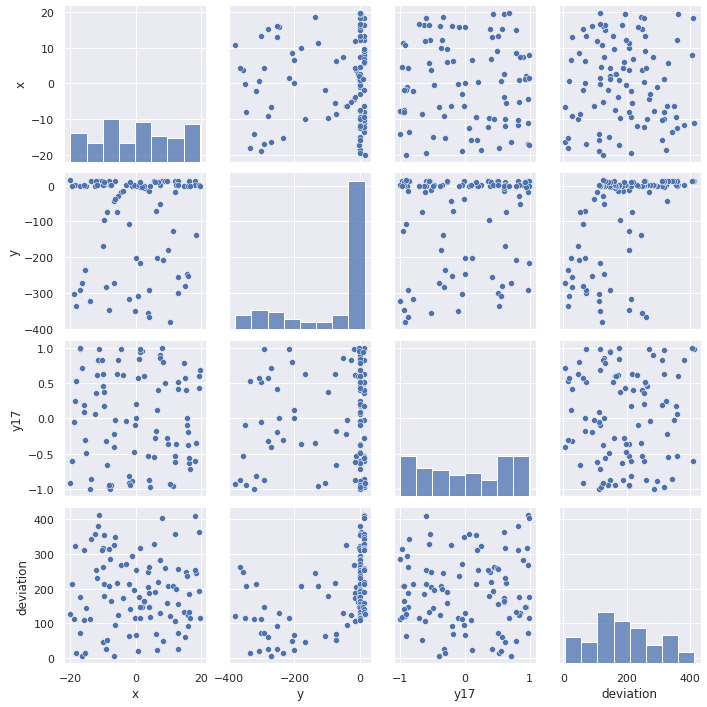

In [ ]:
# drawing pair plot for test dataframe
sns.pairplot(test_df)
plt.show()

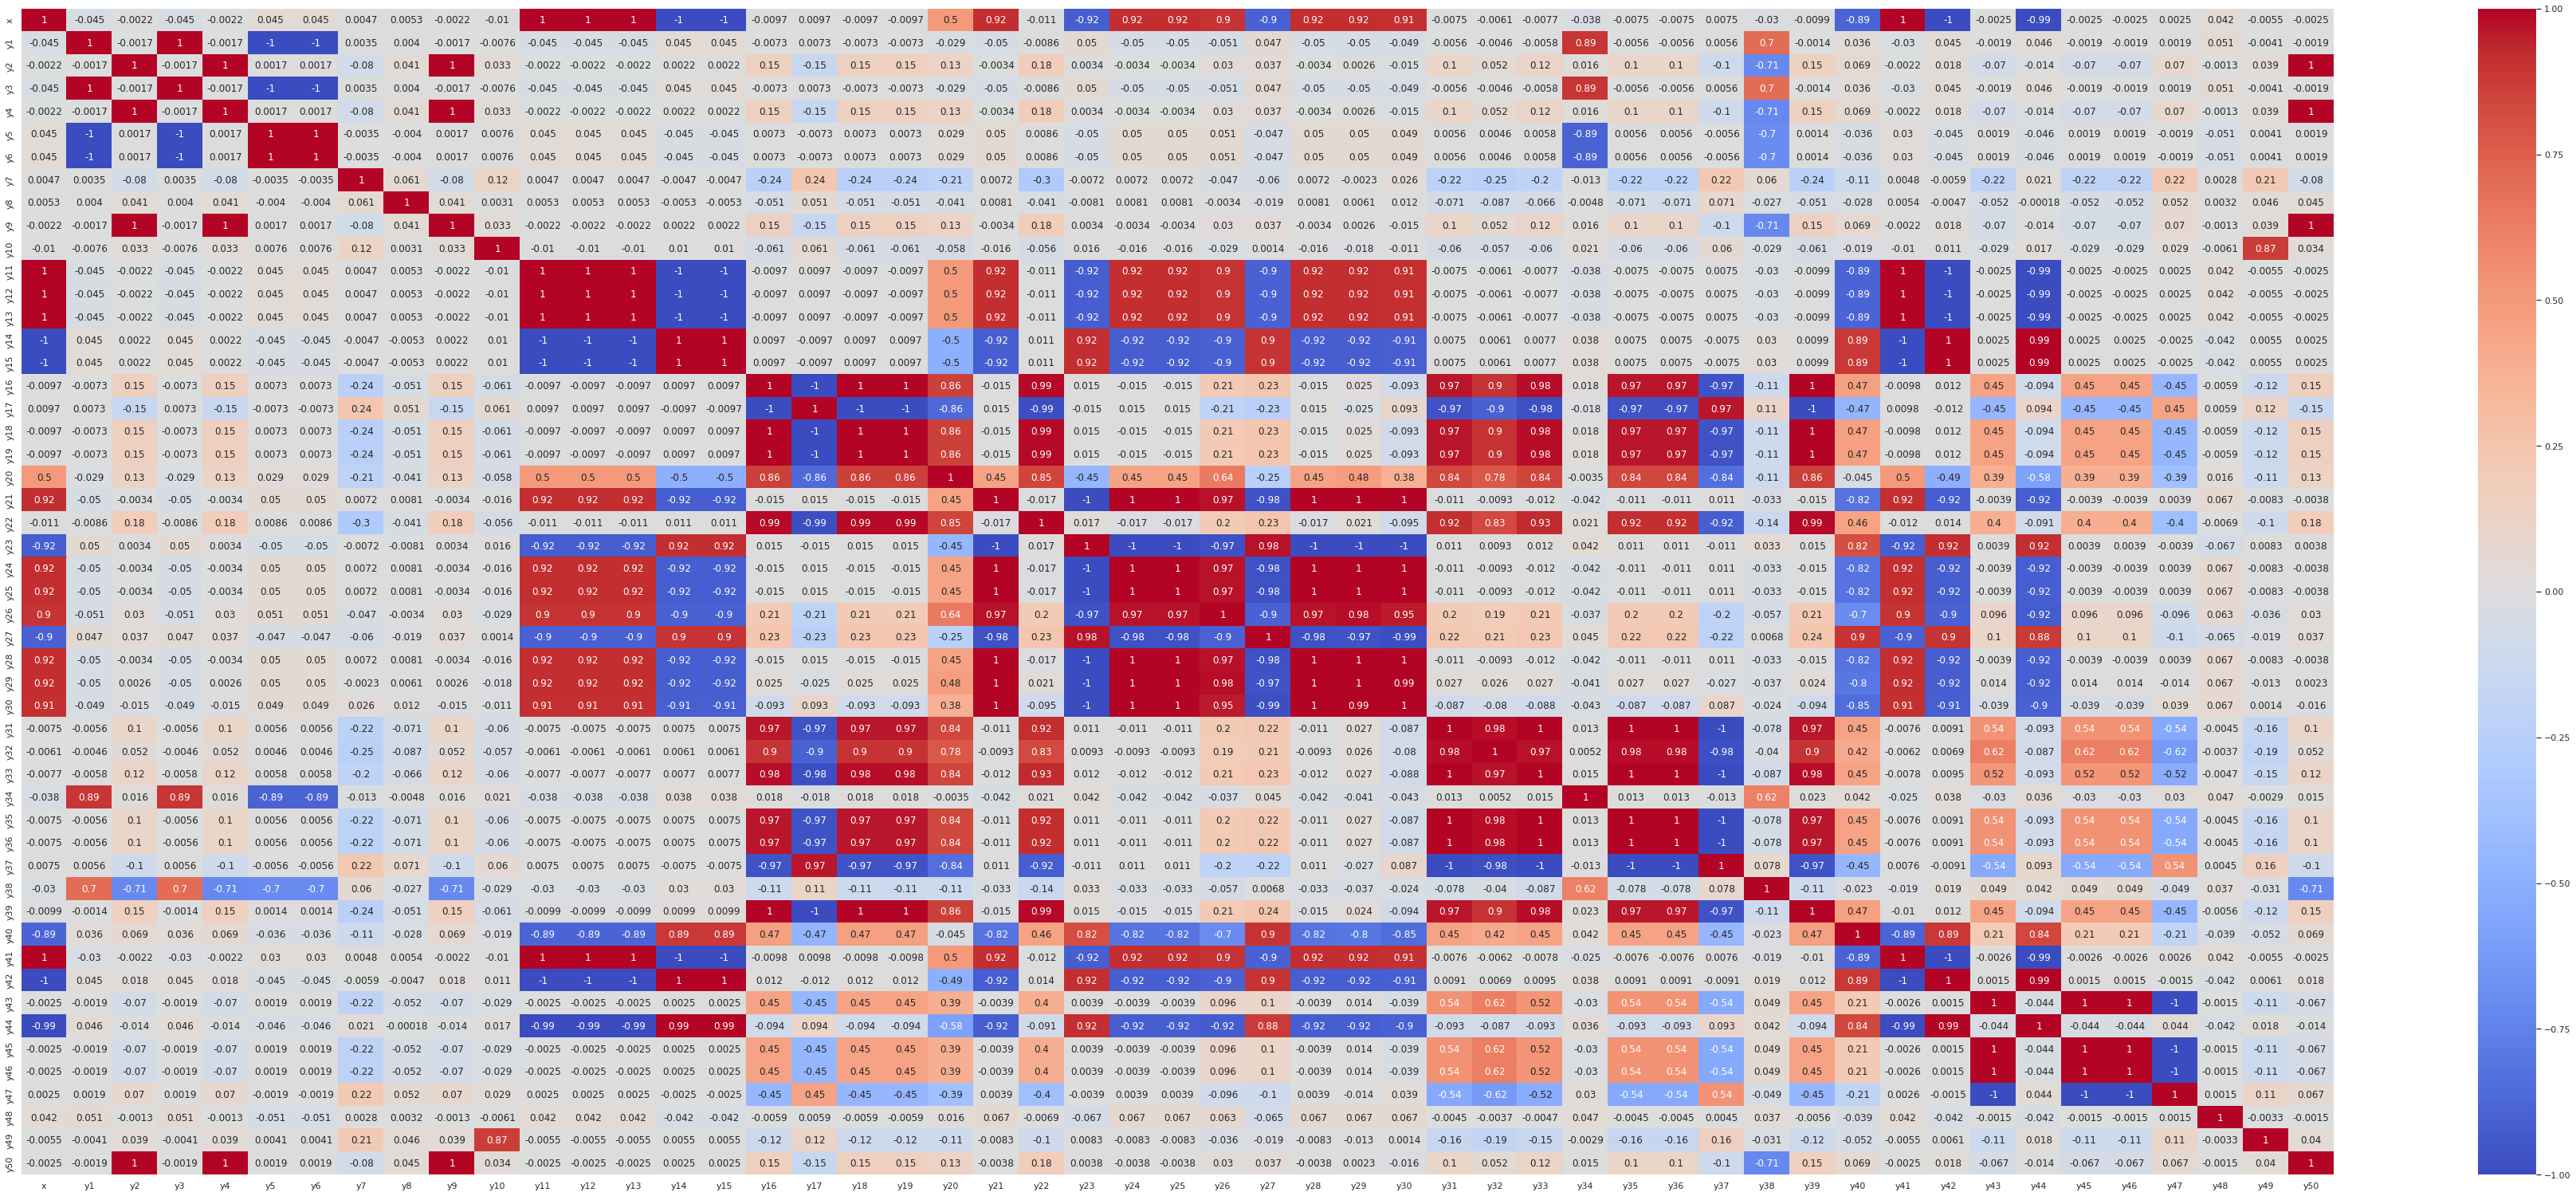

In [ ]:
# heatmap for x vs 50 ideal ideal functions
plt.figure(figsize=(51,21))
sns.heatmap(ideal_df.corr(), annot = True, cmap = "coolwarm")
plt.show()

In [ ]:
def mse(predictions, labels):
    '''
    creating a function to calculate mean square error with two parameters  predictions vs labels
    '''
    error = (np.sum((np.square(predictions-labels))))/len(predictions)
    return error

In [ ]:
mse_error = mse(np.array(list(train_df.y1)), np.array(list(ideal_df.y1)))  # calculating mean square error
mse_error

0.08146362897289983

In [ ]:
try:
  mse_error = mse(np.array(list(train_df.y1)), np.array(list(ideal_df.y1)))  # calculating mean square error
except:
  print("Invalid inputs")
else:
  print("Calculated mean square error for the variable is:",mse_error)
finally:
  print("This code block will always executed")


Calculated mean square error for the variable is: 0.08146362897289983
This code block will always executed


In [ ]:
ideal_df.columns

Index(['x', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10', 'y11',
       'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20', 'y21',
       'y22', 'y23', 'y24', 'y25', 'y26', 'y27', 'y28', 'y29', 'y30', 'y31',
       'y32', 'y33', 'y34', 'y35', 'y36', 'y37', 'y38', 'y39', 'y40', 'y41',
       'y42', 'y43', 'y44', 'y45', 'y46', 'y47', 'y48', 'y49', 'y50'],
      dtype='object')

In [ ]:
error_list = []
for column in list(ideal_df.columns)[1:]:
    prediction = np.array(list(train_df.y1))
    label =  np.array(list(ideal_df[column]))
    mse_error = mse(prediction, label)
    label_error_tuple = column, mse_error
    error_list.append(label_error_tuple)

In [ ]:
def sort_Tuple(tup):
    '''
        Function to sort the list by second item of tuple.
        This Python program is to sort a list of tuples by the second Item using sorted().
        Here reverse = None (Sorts in Ascending order), 
        key is set to sort using second element of,
        sublist lambda has been used.
     '''
    return(sorted(tup, key = lambda x: x[1]))

In [ ]:
error_list = []
for column in list(ideal_df.columns)[1:]:
    prediction = np.array(list(train_df.y1))
    label =  np.array(list(ideal_df[column]))
    mse_error = mse(prediction, label)
    label_error_tuple = column, mse_error
    error_list.append(label_error_tuple)
    
error_list_sorted = sort_Tuple(error_list)
error_list_sorted[0:6]

[('y1', 0.08146362897289983),
 ('y34', 0.4411527261319275),
 ('y38', 0.5772173167852764),
 ('y44', 0.6143406013368494),
 ('y48', 0.6378217695526478),
 ('y50', 1.0233425726831349)]

In [ ]:

def lowest_mse_label(train_feature, data):
    '''
    function to find out lowest mean square error value 
    '''
    error_list = []
    for i in list(data.columns[1:]):
        prediction = np.array(list(data[i]))
        label = np.array(list(train_df[train_feature]))
        error = mse(prediction, label)
        label_error_tuple= i, error
        error_list.append(label_error_tuple)

    error_list_sorted = sort_Tuple(error_list)
    return error_list_sorted[0]

In [ ]:
list(train_df.columns)[1:]

['y1', 'y2', 'y3', 'y4']

In [ ]:
best_label_list = []
for train_col in list(train_df.columns)[1:]:
    best_label = lowest_mse_label(train_col,ideal_df)
    best_label_list.append(best_label)

In [ ]:
best_label_list

[('y1', 0.08146362897289983),
 ('y49', 0.08593427468030088),
 ('y45', 0.07798407794146722),
 ('y17', 0.07611536757347541)]

In [ ]:

def best_label_mapping(train_data, ideal_data):
    '''
    function to find lowest mean square value and return dictionary that contains train features as key and ideal features as value,
    '''
    best_label_list = []
    for train_col in list(train_df.columns)[1:]:
        best_label = lowest_mse_label(train_col,ideal_df)
        best_label_list.append(best_label)
    col_list = list(train_df.columns)[1:]
    
    return dict((zip(col_list,best_label_list )))

In [ ]:
error_mapping_dict= best_label_mapping(train_df, ideal_df)
error_mapping_dict

{'y1': ('y1', 0.08146362897289983),
 'y2': ('y49', 0.08593427468030088),
 'y3': ('y45', 0.07798407794146722),
 'y4': ('y17', 0.07611536757347541)}

In [ ]:
# creating class to select best features for train and ideal data
class Select_best_features:
    def __init__(self, train_data, ideal_data):
        self.train_length = train_data.shape[0]
        self.ideal_length = ideal_data.shape[0]
        self.train_target_feat = list(train_data.columns[1:])
        self.ideal_target_feat = list(ideal_data.columns[1:])
        self.ideal_target_data = ideal_df.iloc[0:,1:]
        self.train_target_data = train_df.iloc[0:, 1:]
        self.ideal_feat_pred = ideal_df.iloc[0:, 0:1]
        self.train_feat_pred = train_df.iloc[0:, 0:1]

In [ ]:
best_features = Select_best_features(train_df, ideal_df)
best_features

In [ ]:
best_features.train_target_feat

['y1', 'y2', 'y3', 'y4']

In [ ]:
# Creating class and function to find values which has lowest mean square error
class Select_best_features:
    def __init__(self, train_data, ideal_data):
        self.train_length = train_data.shape[0]
        self.ideal_length = ideal_data.shape[0]
        self.train_target_feat = list(train_data.columns[1:])
        self.ideal_target_feat = list(ideal_data.columns[1:])
        self.ideal_target_data = ideal_df.iloc[0:,1:]
        self.train_target_data = train_df.iloc[0:, 1:]
        self.ideal_feat_pred = ideal_df.iloc[0:, 0:1]
        self.train_feat_pred = train_df.iloc[0:, 0:1]
        
    def lowest_mse_label(self, train_feature): 
        error_list = []
        for i in self.ideal_target_feat:
            prediction = np.array(list(self.ideal_target_data[i]))
            label = np.array(list(self.train_target_data[train_feature]))
            error = mse(prediction, label)
            label_error_tuple= i, error
            error_list.append(label_error_tuple)

        error_list_sorted = sort_Tuple(error_list)
        return error_list_sorted[0]
      

In [ ]:
def lowest_mse_label(train_feature, data):
    error_list = []
    for i in list(data.columns[1:]):
        prediction = np.array(list(data[i]))
        label = np.array(list(train_df[train_feature]))
        error = mse(prediction, label)
        label_error_tuple= i, error
        error_list.append(label_error_tuple)

    error_list_sorted = sort_Tuple(error_list)
    return error_list_sorted[0]

In [ ]:
best_features = Select_best_features(train_df, ideal_df)
best_features.train_target_feat

['y1', 'y2', 'y3', 'y4']

In [ ]:
#best_features.lowest_mse_label('y4')

In [ ]:
class Select_best_features:
    def __init__(self, train_data, ideal_data):
        self.train_length = train_data.shape[0]
        self.ideal_length = ideal_data.shape[0]
        self.train_target_feat = list(train_data.columns[1:])
        self.ideal_target_feat = list(ideal_data.columns[1:])
        self.ideal_target_data = ideal_df.iloc[0:,1:]
        self.train_target_data = train_df.iloc[0:, 1:]
        self.ideal_feat_pred = ideal_df.iloc[0:, 0:1]
        self.train_feat_pred = train_df.iloc[0:, 0:1]
        
    def lowest_mse_label(self, train_feature):
        error_list = []
        for i in self.ideal_target_feat:
            prediction = np.array(list(self.ideal_target_data[i]))
            label = np.array(list(self.train_target_data[train_feature]))
            error = mse(prediction, label)
            label_error_tuple= i, error
            error_list.append(label_error_tuple)

        error_list_sorted = sort_Tuple(error_list)
        return error_list_sorted[0]
class find_lowest_mse(Select_best_features):
    
    def lowest_mse_all_labels(self):
        best_label_list = []
        for train_col in self.train_target_feat:
            best_label = self.lowest_mse_label(train_col)
            best_label_list.append(best_label)
        col_list = self.train_target_feat
    
        return dict((zip(col_list,best_label_list )))

In [ ]:
new_class_object = find_lowest_mse(train_df, ideal_df)
new_class_object.lowest_mse_all_labels()

{'y1': ('y1', 0.08146362897289983),
 'y2': ('y49', 0.08593427468030088),
 'y3': ('y45', 0.07798407794146722),
 'y4': ('y17', 0.07611536757347541)}

In [ ]:
# create class for MathOperation to define multiplication function
class Math(object):
  def math_multiplication (self,num1,num2):
    ''' 
    provide math multiplication
    num1: first number
    num2: second number
    return multiplication of first and second numbers
    '''
    return  num1*num2
    return result

In [ ]:
# Use Math class to check unit test
import unittest
class UnitTestMath(unittest.TestCase):
  def test_multiplication(self):
    '''
    test math multiplication
    '''
    math_operations = Math()
    result = math_operations.math_multiplication(3,6)
    self.assertEqual(result, 18 , 'The multiplication should be 18')
if __name__=="__main__":
    unittest.main(argv=['first-arg-is-ignored'],exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [ ]:

def maxdev(predictions, labels):
    '''
    function which calculates maximum deviation
    '''
    maxdev = np.max(np.abs((predictions-labels)))
    return maxdev

# Maximum deviation allowed for 'y1' variable 
max_dev_allowed1 = maxdev(np.array(list(train_df.y1)),np.array(list(ideal_df.y1))) * np.sqrt(2)
print('Maximum deviation allowed for y1 variable is', max_dev_allowed1)

# Maximum deviation allowed for 'y2' variable 
max_dev_allowed2 = maxdev(np.array(list(train_df.y2)),np.array(list(ideal_df.y49))) * np.sqrt(2)
print('Maximum deviation allowed for y2 variable is', max_dev_allowed2)

# Maximum deviation allowed for 'y3' variable 
max_dev_allowed3 = maxdev(np.array(list(train_df.y3)),np.array(list(ideal_df.y45))) * np.sqrt(2)
print('Maximum deviation allowed for y3 variable is', max_dev_allowed3)

# Maximum deviation allowed for 'y4' variable 
max_dev_allowed4 = maxdev(np.array(list(train_df.y4)),np.array(list(ideal_df.y17))) * np.sqrt(2)
print('Maximum deviation allowed for y4 variable is', max_dev_allowed4)

Maximum deviation allowed for y1 variable is 0.7065676829765709
Maximum deviation allowed for y2 variable is 0.7070311631873675
Maximum deviation allowed for y3 variable is 0.7005886708775696
Maximum deviation allowed for y4 variable is 0.7060036946079081


<function matplotlib.pyplot.show(*args, **kw)>

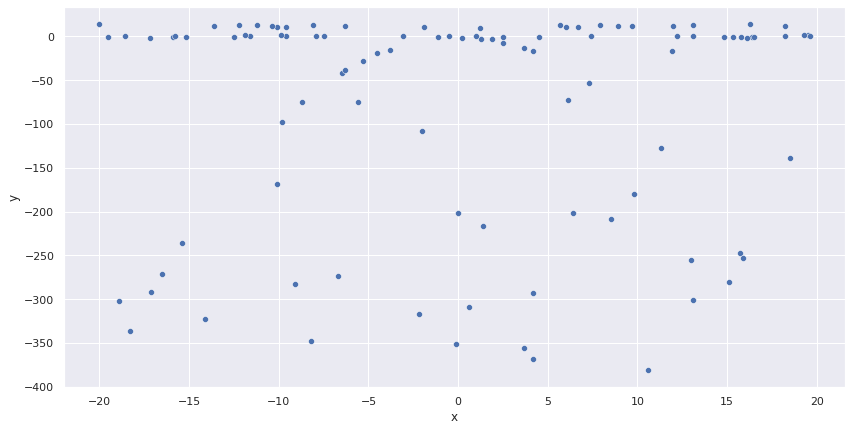

In [ ]:
sns.scatterplot(test_df['x'],test_df['y'])
plt.show

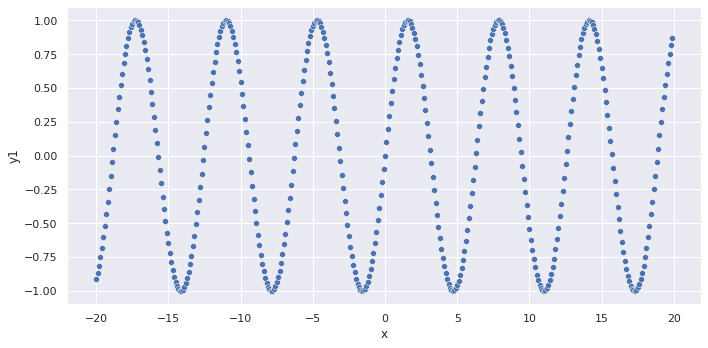

In [ ]:
sns.scatterplot(ideal_df['x'],ideal_df['y1']) # scatterplot for idealy x value and ideal y1

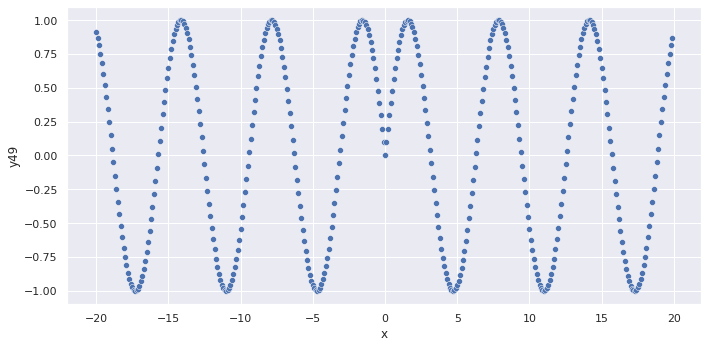

In [ ]:
sns.scatterplot(ideal_df['x'],ideal_df['y49']) # scatter plot for ideal x value and ideal y49

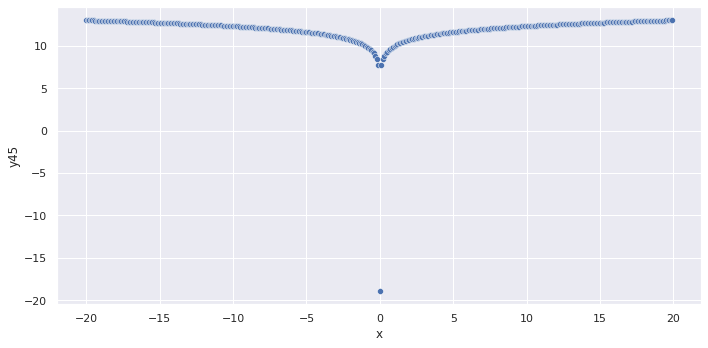

In [ ]:
sns.scatterplot(ideal_df['x'],ideal_df['y45']) # scatter plot for ideal x value and and ideal y45

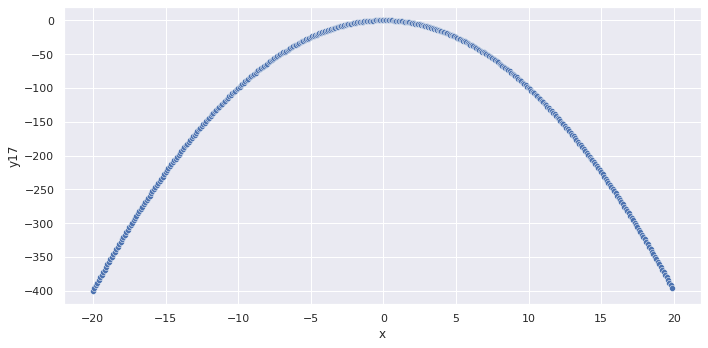

In [ ]:
sns.scatterplot(ideal_df['x'],ideal_df['y17'])  # scatter plot for ideal x value and ideal y17

In [ ]:
# Selected y17 for mapping

In [ ]:
mapping=dict(ideal_df[['x','y1']].values) # mapping between test data and slected ideal data
test_df['y17']=test_df.x.map(mapping)
test_df.head()

,x,y,y17
0,-11.2,12.851657,0.979178
1,18.2,12.374347,-0.604833
2,7.9,13.006841,0.998941
3,9.8,-179.979860,-0.366479
4,18.5,-138.892680,-0.342481


In [ ]:
test_df['deviation']=abs(test_df.y-ideal_df.y17)
test_df.tail()

,x,y,y17,deviation
95,-15.8,0.763152,0.091907,111.013152
96,3.7,-355.829470,-0.529836,247.669470
97,4.2,-367.689640,-0.871576,261.599640
98,-2.2,-316.873020,-0.808496,212.833020
99,1.4,-216.562760,0.985450,114.552760


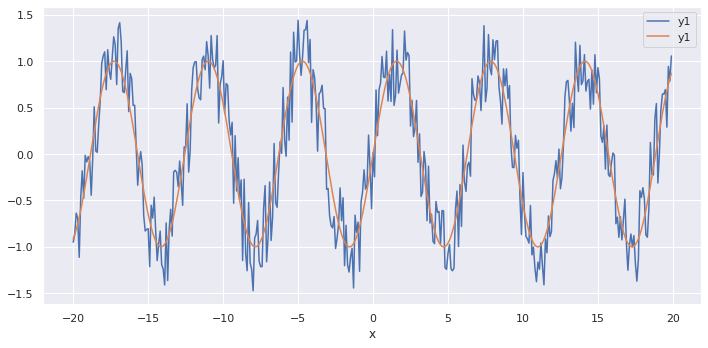

In [ ]:
# plot between train x,train y1 and ideal x and ideal y1

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
ax = train_df.plot(x='x', y='y1')
ideal_df.plot(ax=ax, x='x', y='y1')


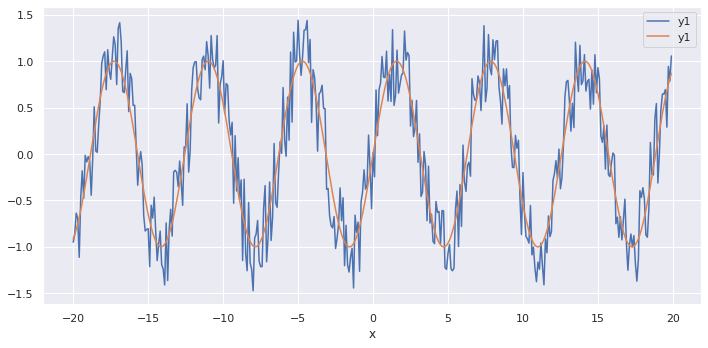

In [ ]:
# plot between train x,train y1 and ideal x and ideal y1

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
ax = train_df.plot(x='x', y='y1')
ideal_df.plot(ax=ax, x='x', y='y1')


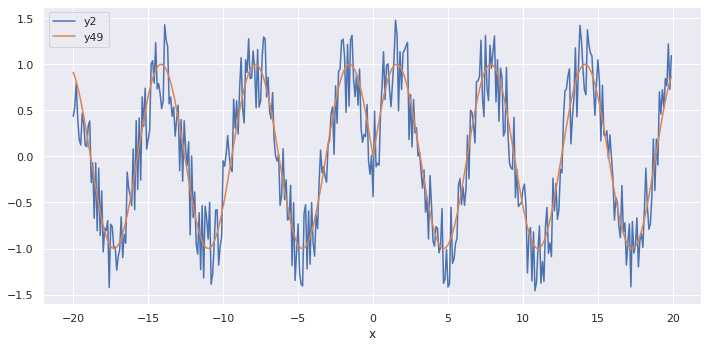

In [ ]:
# plot between train x,train y2 and ideal x and ideal y49
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
ax = train_df.plot(x='x', y='y2')
ideal_df.plot(ax=ax, x='x', y='y49')


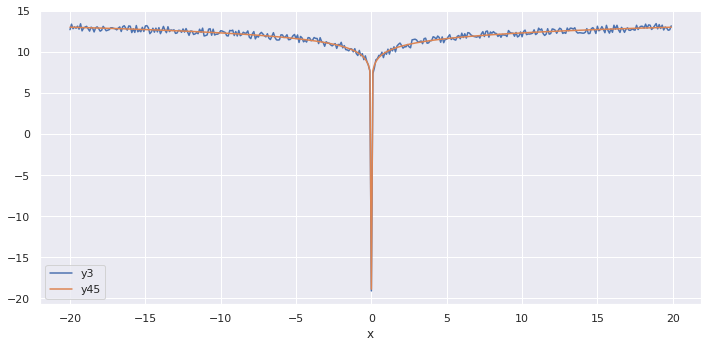

In [ ]:
# plot between train x,train y3 and ideal x and ideal y45

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
ax = train_df.plot(x='x', y='y3')
ideal_df.plot(ax=ax, x='x', y='y45')


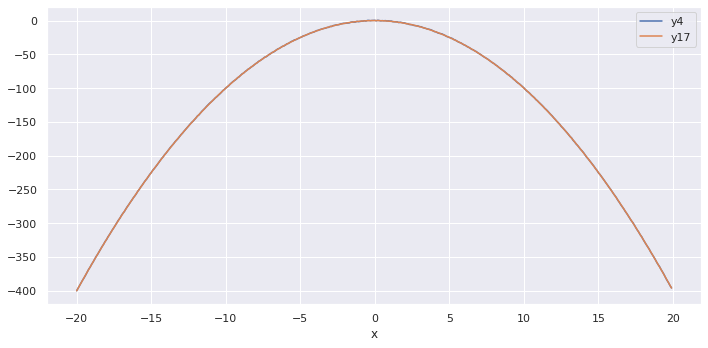

In [ ]:
# plot between train x,train y4 and ideal x and ideal y417

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
ax = train_df.plot(x='x', y='y4')
ideal_df.plot(ax=ax, x='x', y='y17')

plt.show()

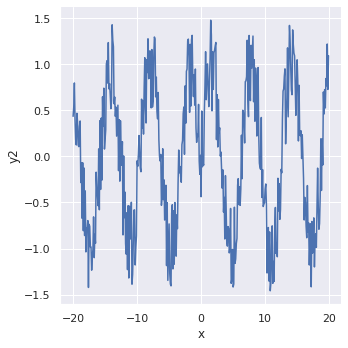

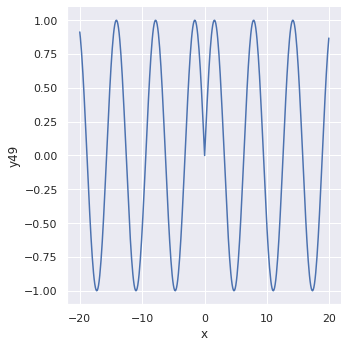

In [ ]:
sns.relplot(data = train_df, x = 'x', y = 'y2', kind = 'line', palette = ['red'])
sns.relplot(data = ideal_df, x = 'x', y = 'y49', kind = 'line',palette = ['red'])

In [ ]:
pip install bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bokeh.plotting import figure, output_file, show #using bokeh library

In [ ]:
# creating an empty figure with specific plot
# width and height
fig = figure(plot_width = 600 , plot_height = 600)
fig = figure(title = "Scatter plot of updated test dataset")
fig.xaxis.axis_label = 'x-variable'
fig.yaxis.axis_label = 'y-variable'
 
# plotting the points in the form of
# circular glyphs
fig.circle(test_df.x, test_df.y, color = "yellow", legend_label = "y", size = 20)
 
# plotting the points in the form of
# square glyphs
fig.square(test_df.x, test_df.y17, color = "blue", legend_label = "y10", size = 15, alpha = 0.5)
 
# plotting the points in the form of
# hex glyphs
fig.hex(test_df.x, test_df.deviation, color = "green", legend_label = "Deviation", size = 10, alpha = 0.7)

# showing the above plot
fig.scatter(source=test_df)
show(fig)

In [ ]:
pip install pandas_bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas_bokeh

In [ ]:
ideal_graph= ideal_df.plot_bokeh(kind='hist',title='ideal x vs ideal y17',figsize=(1000,800),xlabel='x',ylabel='y17')
show(ideal_graph)


In [ ]:
train_graph= train_df.plot_bokeh(kind='hist',title='train x vs train= y4',figsize=(1000,800),xlabel='x',ylabel='y4')
show(train_graph)
